# NFL injury Analysis

In [3]:
import pandas as pd
df = pd.read_csv("D:/NFL/PlayList.csv")

In [29]:
import pandas as pd
df = pd.read_csv("D:/NFL/PlayList.csv")
df.isna().sum()

PlayerKey             0
GameID                0
PlayKey               0
RosterPosition        0
PlayerDay             0
PlayerGame            0
StadiumType       16910
FieldType             0
Temperature           0
Weather           18691
PlayType            367
PlayerGamePlay        0
Position              0
PositionGroup         0
dtype: int64

In [3]:
df['PlayType'].isna().sum()

367

In [4]:
df.head()

,PlayerKey,GameID,PlayKey,RosterPosition,PlayerDay,PlayerGame,StadiumType,FieldType,Temperature,Weather,PlayType,PlayerGamePlay,Position,PositionGroup
0,26624,26624-1,26624-1-1,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,1,QB,QB
1,26624,26624-1,26624-1-2,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,2,QB,QB
2,26624,26624-1,26624-1-3,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Rush,3,QB,QB
3,26624,26624-1,26624-1-4,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Rush,4,QB,QB
4,26624,26624-1,26624-1-5,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,5,QB,QB


we can fill up the missing values in playtype based on the players position.

In [6]:
df[['Position','PositionGroup']][df['PlayType'].isna()].value_counts()

Position  PositionGroup
WR        WR               49
CB        DB               49
G         OL               34
OLB       LB               33
DT        DL               27
T         OL               26
RB        RB               21
QB        QB               21
FS        DB               20
C         OL               16
DE        DL               16
SS        DB               15
ILB       LB               13
NT        DL                8
MLB       LB                8
TE        TE                7
LB        LB                2
DE        LB                2
dtype: int64

In [30]:
v = df[['Position','PositionGroup']][df['PlayType'].isna()].value_counts()
#print(v)
for i,j in v.items():
    x = df['PlayType'][df[['RosterPosition','PlayType']][df['Position']==i[0]].value_counts()].max()
    print(i,x)

('WR', 'WR') Rush
('CB', 'DB') Rush
('G', 'OL') Pass
('OLB', 'LB') Rush
('DT', 'DL') Rush
('T', 'OL') Rush
('RB', 'RB') Rush
('QB', 'QB') Rush
('FS', 'DB') Rush
('C', 'OL') Rush
('DE', 'DL') Rush
('SS', 'DB') Rush
('ILB', 'LB') Rush
('NT', 'DL') Rush
('MLB', 'LB') Rush
('TE', 'TE') Rush
('LB', 'LB') Rush
('DE', 'LB') Rush


Found the playtype of players based on their position.There is a high chance of injury during players passing or rush
towards the ball.

In [31]:
c = df['PlayType'][(df['Position']=='G')&(df['PositionGroup']=='OL')].isna()
ls = []
for k,v in c.items():
    if v== True:
        ls.append(k)
print(ls)
print(len(ls))

[16896, 84023, 92123, 108684, 108741, 108760, 108946, 109179, 164389, 164405, 174244, 174278, 176669, 176843, 177035, 187467, 187568, 187583, 187645, 187649, 187776, 187964, 200974, 201723, 201726, 201843, 201906, 201946, 202153, 213844, 214271, 214279, 263509, 263674]
34


Filling the playtype value of pass during position as G & position group as OL

In [34]:
#df['PlayType'].isna().sum()
for i in ls:
    df['PlayType'] = df['PlayType'].fillna({i:'Pass'})

In [35]:
df['PlayType'] = df['PlayType'].fillna('Rush')

Filled the playtype value of rush for other missing values in it.

In [4]:
df1 = pd.read_csv("D:/NFL/InjuryRecord.csv")

In [6]:
df = df.merge(right=df1,on='PlayerKey',how='inner')
df['PlayerGamePlay'][df['PlayerKey']==31070]

0       1
1       2
2       3
3       4
4       5
       ..
273    29
274    30
275    31
276    32
277    33
Name: PlayerGamePlay, Length: 278, dtype: int64

Merging the injury data based on playerkey.

In [13]:
df = df.drop('PlayKey_y',axis=1)

dropping the playkey_y column from injury dataset.since we already have playkey column in our current file.

In [14]:
df.columns

Index(['PlayerKey', 'GameID_x', 'PlayKey_x', 'RosterPosition', 'PlayerDay',
       'PlayerGame', 'StadiumType', 'FieldType', 'Temperature', 'Weather',
       'PlayType', 'PlayerGamePlay', 'Position', 'PositionGroup', 'GameID_y',
       'BodyPart', 'Surface', 'DM_M1', 'DM_M7', 'DM_M28', 'DM_M42'],
      dtype='object')

data_corr = df.corr()
data_corr.style.background_gradient(cmap='summer')

In [16]:
dd = df.corr()
dd = dd[dd<1].max()
dd[dd == dd.max()]

PlayerDay     0.850028
PlayerGame    0.850028
dtype: float64

In [17]:
cc = df.corr()
cc = cc[cc<0].min()
cc[cc==cc.min()]

PlayerKey   -0.207334
DM_M28      -0.207334
dtype: float64

In [18]:
df.columns

Index(['PlayerKey', 'GameID_x', 'PlayKey_x', 'RosterPosition', 'PlayerDay',
       'PlayerGame', 'StadiumType', 'FieldType', 'Temperature', 'Weather',
       'PlayType', 'PlayerGamePlay', 'Position', 'PositionGroup', 'GameID_y',
       'BodyPart', 'Surface', 'DM_M1', 'DM_M7', 'DM_M28', 'DM_M42'],
      dtype='object')

In [ ]:
df = df.drop('PlayKey_y',axis=1)

In [78]:
a = df['GameID_x'].unique()
ls = []
for i in a:
    i = i[6:]
    ls.append(i)
    x = set(ls)
x=list(x)
dd = pd.Series(data=x,name='GameID')

<AxesSubplot:xlabel='count', ylabel='RosterPosition'>

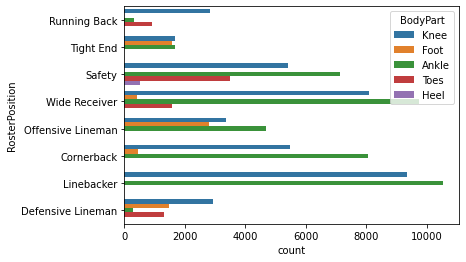

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(y=df['RosterPosition'],hue=df['BodyPart'])

Players injuries on specific body parts based on their position of running.

<AxesSubplot:xlabel='count', ylabel='Position'>

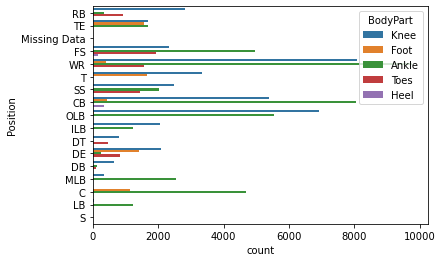

In [81]:
sns.countplot(y=df['Position'],hue=df['BodyPart'])

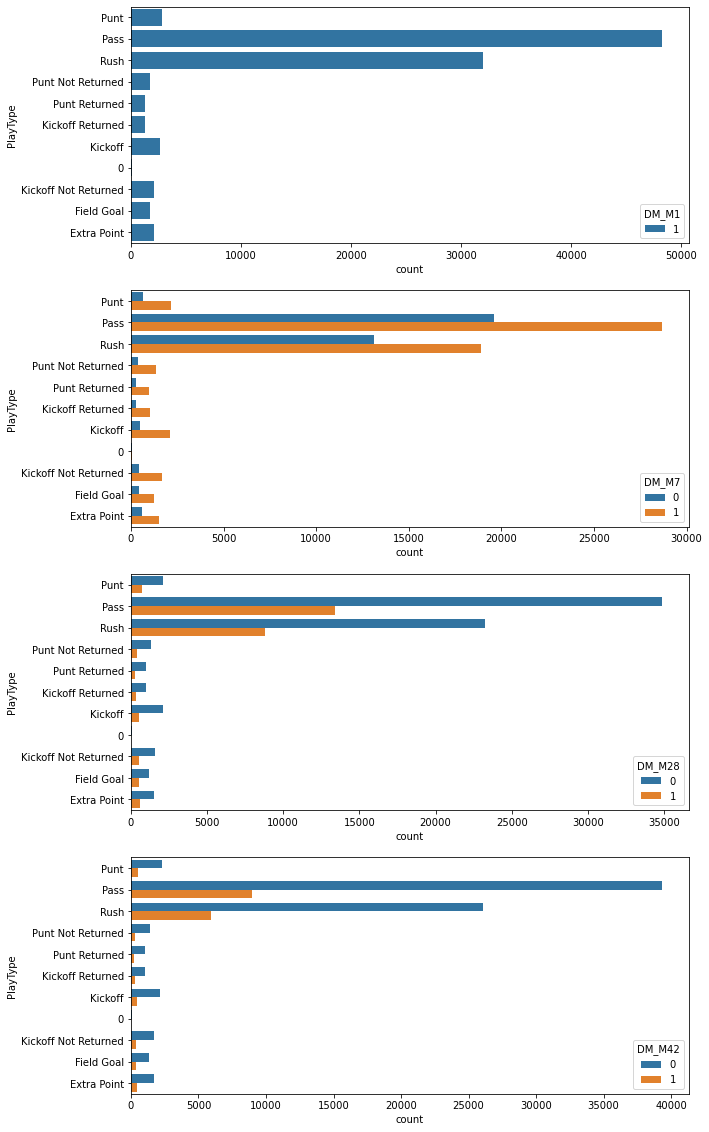

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
cc = df[['DM_M1','DM_M7','DM_M28','DM_M42']]
fig,axs = plt.subplots(ncols=1,nrows=4,figsize=(10,20))
axs = axs.flatten()
index = 0
for k,v in cc.items():
    sns.countplot(y=df['PlayType'],hue=v,ax=axs[index])
    index += 1

# PlayType 0 representing player as a substituted one.....?????? cross check with playerday or possibility of missing the game due to injury.

<AxesSubplot:xlabel='count', ylabel='RosterPosition'>

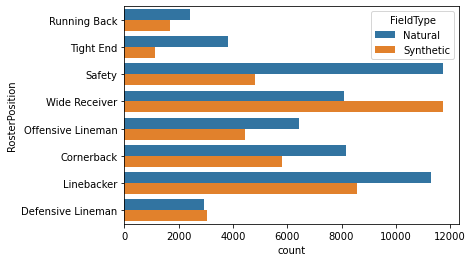

In [23]:
sns.countplot(y=df['RosterPosition'],hue=df['FieldType'])

df[['RosterPosition','FieldType','PlayType','Position','PositionGroup','BodyPart',
    'Surface','DM_M1', 'DM_M7', 'DM_M28', 'DM_M42']

In [ ]:
df[['PlayerGamePlay','RosterPosition','PlayType','PositionGroup']][df['Position']=='G'].value_counts()
df['RosterPosition'][(df['PlayType']=='Rush')&(df['Position']=='G')].value_counts()
df['RosterPosition'][(df['PlayType']=='Punt Not Returned')&(df['Position']=='G')].value_counts()

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None
df = pd.read_csv("D:\Analytics Project\Airbnb\Airbnb_Open_Data.csv")
df.head(2)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
